**KNN - Using pandas and scikit-learn 
The model is built using the iris dataset with 4 features**

**Load the data** 

In [165]:
#load the iris data 
import csv 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline
with open('iris.data.txt') as csvfile:
    data = csv.reader(csvfile)
    newdata=[]
    for i in data:
        newdata.append(i)
        data = pd.DataFrame(newdata)
        
 
    

**Asign column names and one hot encoding**

In [166]:
#updating the column names
data.columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','target']
#data.tail(100)


In [167]:
# data["target"]=data["target"].astype('category')
# # data.dtypes
# data["target_val"] = data["target"].cat.codes
# data=data[:-1]
# data = data.drop(columns='target')
#data.head()

#one-hot encoding
categorical_features = ["target"]
data = pd.get_dummies(data,columns=categorical_features)

In [168]:
#removing the last row (null value)
#coverting the datatype and spliting the values for X and Y 
data[["target_Iris-setosa","target_Iris-versicolor","target_Iris-virginica"]]=data[["target_Iris-setosa","target_Iris-versicolor","target_Iris-virginica"]].astype(float)
data=data.iloc[:-1]
x = data.iloc[:,0:4]
y = data.iloc[:,-1]


**Train the model and get the accuracy**
**Other metrics can be used for performance measures**

In [169]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=4)


In [170]:
scores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    

In [171]:
scores

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'Accuracy')

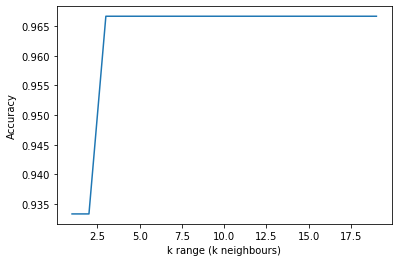

In [172]:
plt.plot(range(1,20),scores)
plt.xlabel("k range (k neighbours)")
plt.ylabel("Accuracy")

**The k value is 0.96 from 3 to ~15, which can be used as one value to train the model with unseen values.**

setosa


Text(0, 0.5, 'predicted values')

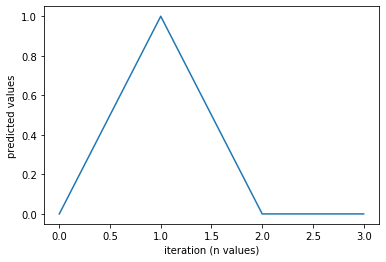

In [176]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)
n= range(4)
species = {0:'setosa',1:'versicolor',2:'virginica'}
new_x_value = [[5.1,3,1,0.2],[1.2,2,6,4],[1,1,1,1],[1,3,4,2]]
y_predict = knn.predict(new_x_value)
print(species[y_predict[3]])
plt.plot(n,y_predict)
plt.xlabel("iteration (n values)")
plt.ylabel("predicted values")